## CNN Model Using Transfer Learning Using vgg16 

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [2]:
IMAGE_SIZE = [224, 224]

train_path = 'Desktop\Datasets\Train'
valid_path = 'Desktop\Datasets\Test'


In [3]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [4]:
for layer in vgg.layers:
  layer.trainable = False
  

In [5]:
folders = glob('Desktop\Datasets\Train\*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)


In [7]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)


In [8]:
# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Desktop\Datasets\Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Desktop\Datasets\Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4 images belonging to 4 classes.
Found 4 images belonging to 4 classes.


In [11]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12312\708679198.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
1/1 [==============================] - 12s 12s/step - loss: 1.8815 - accuracy: 0.2500 - val_loss: 1.6320 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 10s 10s/step - loss: 1.3519 - accuracy: 0.5000 - val_loss: 1.8515 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 10s 10s/step - loss: 0.9982 - accuracy: 0.7500 - val_loss: 1.7073 - val_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 11s 11s/step - loss: 0.5483 - accuracy: 0.7500 - val_loss: 1.4453 - val_accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 10s 10s/step - loss: 0.2365 - accuracy: 1.0000 - val_loss: 1.1793 - val_accuracy: 0.5000


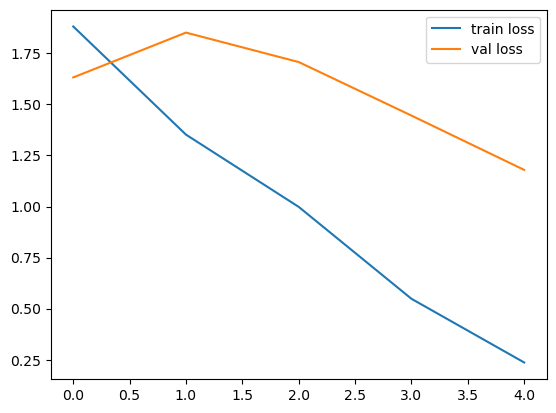

<Figure size 640x480 with 0 Axes>

In [12]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


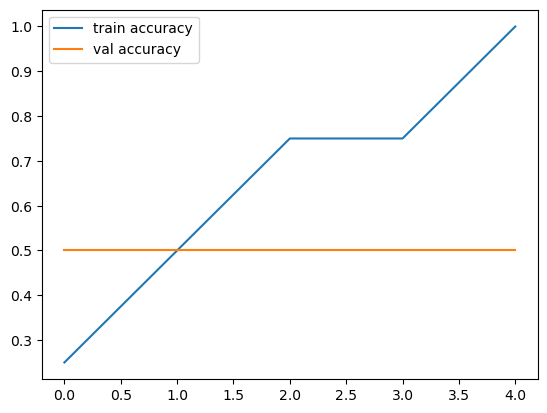

<Figure size 640x480 with 0 Axes>

In [14]:
# accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_accuaracy')


In [15]:
import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_model.h5')